# MT3DMS Documentation

In [1]:
from IPython.display import *
import IPython.core.display as di # Example: di.display_html('<h3>%s:</h3>' % str, raw=True)
# This line will hide code by default when the notebook is exported as HTML
di.display_html('<script>jQuery(function() {if (jQuery("body.notebook_app").length == 0) { jQuery(".input_area").toggle(); jQuery(".prompt").toggle();}});</script>', raw=True)

# This line will add a button to toggle visibility of code blocks, for use with the HTML export version
di.display_html('''<button onclick="jQuery('.input_area').toggle(); jQuery('.prompt').toggle();">Toggle code</button>''', raw=True)

Toggle code

## Transport Model

The transport of contaminants follows the following differential equation: (Zheng and Wang, 1999)

$\frac{\partial(\theta C^k)}{\partial t} = \frac{\partial}{\partial x_i}\Big(\theta D_{ij}\frac{\partial C^k}{\partial x_j} \Big) - \frac{\partial}{\partial x_i}(\theta v_i C^k) + q_s C^k_s + \Sigma R_n$ 

Where:

| Parameters | Explanation |
| --- |---|
|$C^k$ | the dissolved concentration of species k [$ML^{-3}$] |
|$\theta$ |    the porosity of the subsurface medium [Dimensionless] |
|$t$| time [$T$]|
|$x_i$ | the distance along the respective Cartesian coordinate axis [$L$] |
|$D_{ij}$ | the hydrodynamic dispersion coefficient tensor [$L^2 T^{-1}$] |
|$v_i$ | the seepage or linear pore water velocity [$LT^{-1}$] |
|$q_s$ | the volumetric flow rate per unit volume of aquifer representing fluid sources (positive) and sinks (negative) [$T^{-1}$] |
|$C^k_s$| the concentration of the source or sink flux for species k [$ML^{-3}$]|
|$\Sigma R_n$ | the chemical reaction term [$ML^{-3}T^{-1}$]|


### Overview

The transport function is active when the 'Enabled' box is marked. Also, two versions of MT3D (MT3DMS and MT3D-USGS) can be selected to simulate solute transport on the platform.

***The changes will not be saved automatically in the system, please click "save" botton when you want to save the changes in each dialogue box***

***The more specific explanation for the variable can be found in the question mark after the variable.*** 

In [2]:
Image('doc/question.PNG')

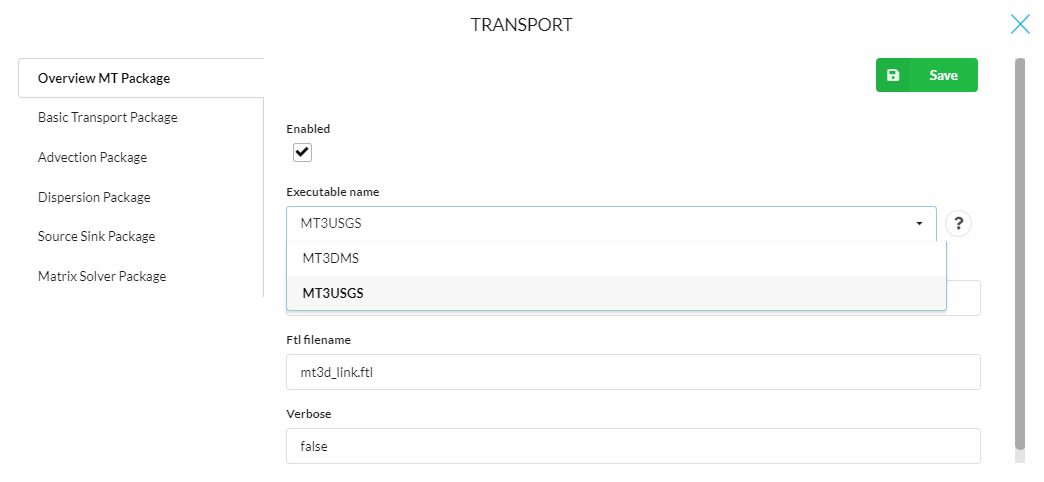

In [3]:
Image('doc/mt3d.png')

### Basic Transport Package 

The following parameters are required for Basic Transport Package:

#### Basic parameters

* Total species (Ncomp): The total number of chemical species in the simulation. (Defaut is 1)

* Mobile species (Mcomp): The total number of 'mobile' species. mcomp must be equal or less than ncomp. (Defaut is 1)

* Porosity (Prsity): The effective porosity of the porous medium in a single porosity system, or the mobile porosity in a dual-porosity medium. (Defaut is 0.3)

* Concentration boundary indicator (Icbund): The Icbund specifies the boundary condition type for solute species (shared by all species). 
> * If icbund = 0, the cell is an inactive concentration cell; 
> * If icbund < 0, the cell is a constant-concentration cell; 
> * if icbund > 0, the cell is an active concentration cell where the concentration value will be calculated. (Defaut value is 1)

* Starting concentration (Sconc): The Sconc defines the starting concentration for the first species. (Defaut is 0)

***The platform only works for one species up to now. Also, icbund and sconc could only be defined as a single value for the whole model domain.***

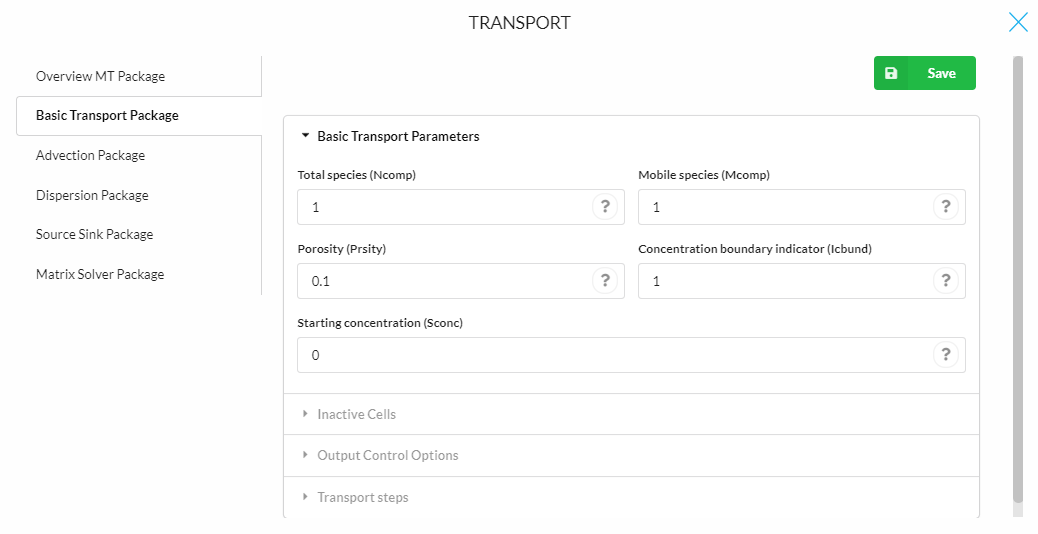

In [4]:
Image('doc/btn1.png')

#### Inactive cells

* Inactive concentration cells (Clinact): The value for indicating an inactive concentration cell. (default is 1e+30)
* Minimum saturated thickness(Thkmin): The minimum saturated thickness in a cell, expressed as the decimal fraction of its thickness, below which the cell is considered inactive. (default is 0.01, 1% of the model thickness)

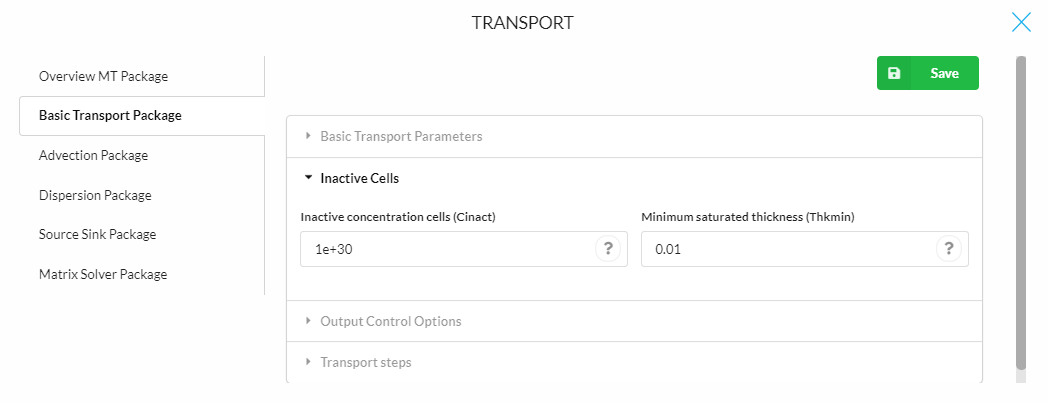

In [5]:
Image('doc/btn2.png')

#### Output Control Options

* Ifmtcn: A flag/format code indicating how the calculated concentration should be printed to the standard output text file. Format codes for printing are listed in Table 3 of the MT3DMS manual. 
> * If ifmtcn > 0 printing is in wrap form; 
> * ifmtcn < 0 printing is in strip form; 
> * if ifmtcn = 0 concentrations are not printed. (default).
* Ifmtnp: A flag/format code indicating how the number of particles should be printed to the standard output text file. The convention is the same as for ifmtcn. (default is 0).
* Ifmtrf: A flag/format code indicating how the calculated retardation factor should be printed to the standard output text file. The convention is the same as for ifmtcn. (default is 0).
* A flag/format code indicating how the distance-weighted dispersion coefficient should be printed to the standard output text file. The convention is the same as for ifmtcn. (default is 0).
* Nprs: A flag indicating (i) the frequency of the output and (ii) whether the output frequency is specified in terms of total elapsed simulation time or the transport step number. 
> * If nprs > 0 results will be saved at the times as specified in timprs; 
> * if nprs = 0, results will not be saved except at the end of simulation; (default)
> * if nprs < 0, simulation results will be saved whenever the number of transport steps is an even multiple of nprs. .
* Nprobs: An integer indicating how frequently the concentration at the specified observation points should be saved. (default is 1).
* Nprmas: An integer indicating how frequently the mass budget information should be saved. (default is 1).

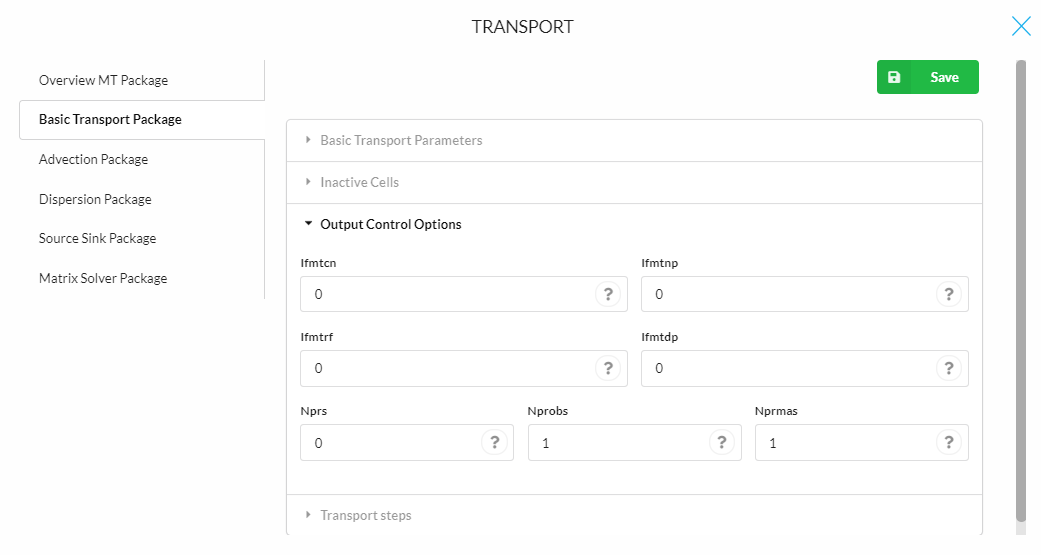

In [6]:
Image('doc/btn3.png')

#### Transport steps

* Transport stepsize (Dt0): The user-specified initial transport step size within each time-step of the flow solution. (default is 0)
* Maximum transport steps (Mxstrn): The maximum number of transport steps allowed within one time step of the flow solution. (default is 50000)
* Transport step multiplier (Ttsmult): The multiplier for successive transport steps within a flow time-step if the GCG solver is used and the solution option for the advection term is the standard finite-difference method. (default is 1.0)
* Maximum transport stepsize (Ttsmax): The maximum transport step size allowed when transport step size multiplier TTSMULT > 1.0. (default is 0)

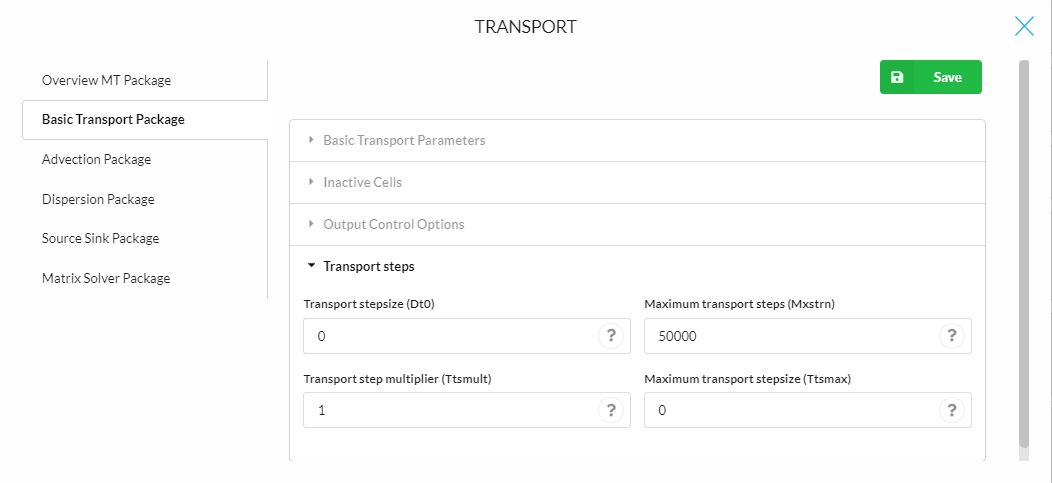

In [7]:
Image('doc/btn4.png')

### Advection Package

In the advection package, advection solution option (Mixelm) should be defined first.


Mixelm = 0 is the standard finite-difference method with upstream or central-in-space weighting, depending on the value of NADVFD. 

>The following parameters are for determining advection and particle tracking :

> * Courant number (Percel): PERCEL is the Courant number (i.e., the number of cells, or a fraction of a cell) advection will be allowed in any direction in one transport step. For implicit finite-difference or particle-tracking-based schemes, there is no limit on PERCEL, but for accuracy reasons, it is generally not set much greater than one. Note, however, that the PERCEL limit is checked over the entire model grid. Thus, even if PERCEL > 1, advection may not be more than one cell’s length at most model locations. For the explicit finite-difference or the third-order TVD scheme, PERCEL is also a stability constraint which must not exceed one and will be automatically reset to one if a value greater than one is specified.

> * Weighting scheme (Nadvfd): 
>> * Nadvfd = 0 or 1, upstream weighting (default); 
>> * Nadvfd = 2, central-in-space weighting.

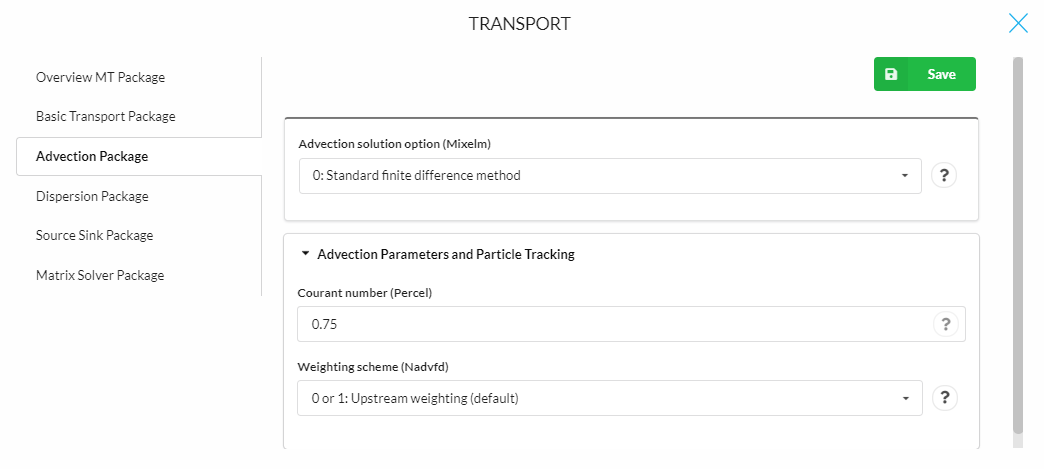

In [8]:
Image('doc/adv1.png')

Mixelm = 1 is the forward-tracking method of characteristics (MOC) 
> The following parameters are for determining advection and particle tracking:
> * Courant number (Percel)
> * Maximum moving particles (Mxpart)  
> * Particle tracking algorithm (Itrack): ITRACK is a flag indicating which particle-tracking algorithm is selected for the Eulerian-Lagrangian methods. 
>> * ITRACK = 1, the first-order Euler algorithm is used. 
>> * ITRACK = 2, the fourth-order Runge-Kutta algorithm is used; this option is computationally demanding and may be needed only when PERCEL is set greater than one. 
>> * ITRACK = 3, the hybrid first- and fourth-order algorithm is used; 
>> * the Runge-Kutta algorithm is used in sink/source cells and the cells next to sinks/sources while the Euler algorithm is used elsewhere.
> * Concentration weighting factor (Wd): is a concentration weighting factor between 0.5 and 1. It is used for operator splitting in the particle- tracking-based methods. The value of 0.5 is generally adequate. The value of WD may be adjusted to achieve better mass balance. Generally, it can be increased toward 1.0 as advection becomes more dominant. (default is 0.5)

> The following parameters are for determining particle distribution:
> * Dceps: is a small Relative Cell Concentration Gradient below which advective transport is considered.
> * Nplane: NPLANE is a flag indicating whether the random or fixed pattern is selected for initial placement of moving particles. 
>> * If NPLANE = 0, the random pattern is selected for initial placement. Particles are distributed randomly in both the horizontal and vertical directions by calling a random number generator. This option is usually preferred and leads to smaller mass balance discrepancy in nonuniform or diverging/converging flow fields. 
>> * If NPLANE > 0, the fixed pattern is selected for initial placement. The value of NPLANE serves as the number of vertical ‘planes’ on which initial particles are placed within each cell block. The fixed pattern may work better than the random pattern only in relatively uniform flow fields. For two-dimensional simulations in plan view, set NPLANE = 1. For cross sectional or three-dimensional simulations, NPLANE = 2 is normally adequate. Increase NPLANE if more resolution in the vertical direction is desired.
> * Npl: is the number of initial particles per cell to be placed at cells where the Relative Cell Concentration Gradient is less than or equal to DCEPS. Generally, NPL can be set to zero since advection is considered insignificant when the Relative Cell Concentration Gradient is less than or equal to DCEPS. Setting NPL equal to NPH causes a uniform number of particles to be placed in every cell over the entire grid (i.e., the uniform approach).
> * Nph: is the number of initial particles per cell to be placed at cells where the Relative Cell Concentration Gradient is greater than DCEPS. The selection of NPH depends on the nature of the flow field and also the computer memory limitation. Generally, a smaller number should be used in relatively uniform flow fields and a larger number should be used in relatively nonuniform flow fields. However, values exceeding 16 in two-dimensional simulation or 32 in three- dimensional simulation are rarely necessary. If the random pattern is chosen, NPH particles are randomly distributed within the cell block. If the fixed pattern is chosen, NPH is divided by NPLANE to yield the number of particles to be placed per vertical plane.
> * Npmin: is the minimum number of particles allowed per cell. If the number of particles in a cell at the end of a transport step is fewer than NPMIN, new particles are inserted into that cell to maintain a sufficient number of particles. NPMIN can be set to zero in relatively uniform flow fields and to a number greater than zero in diverging/converging flow fields. Generally, a value between zero and four is adequate.
> * Npmax: is the maximum number of particles allowed per cell. If the number of particles in a cell exceeds NPMAX, all particles are removed from that cell and replaced by a new set of particles equal to NPH to maintain mass balance. Generally, NPMAX can be set to approximately two times of NPH.

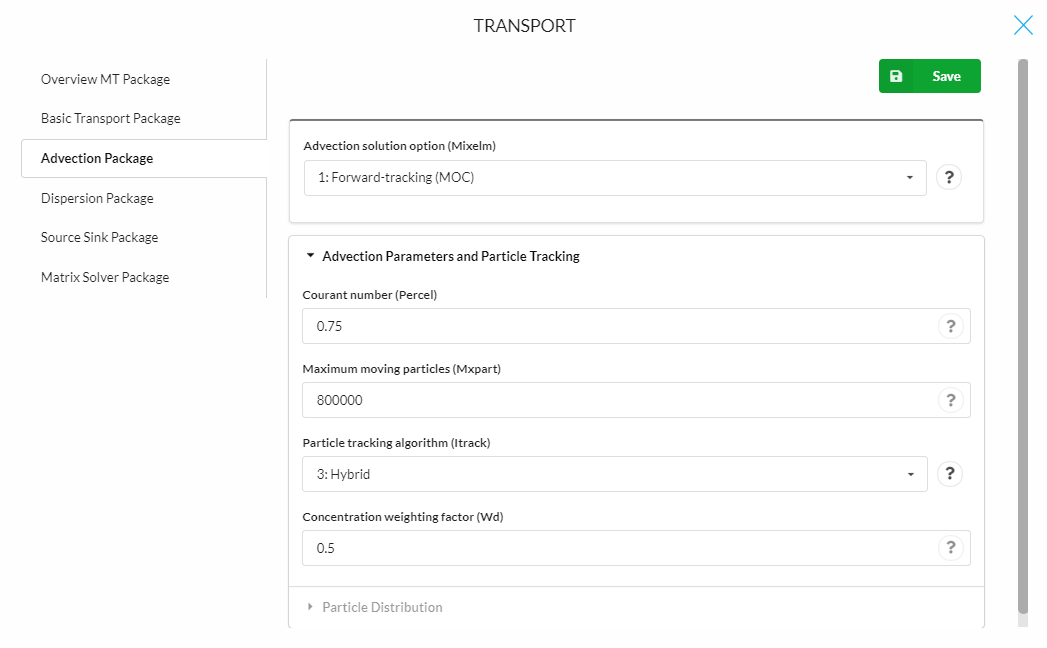

In [9]:
Image('doc/adv2.png')

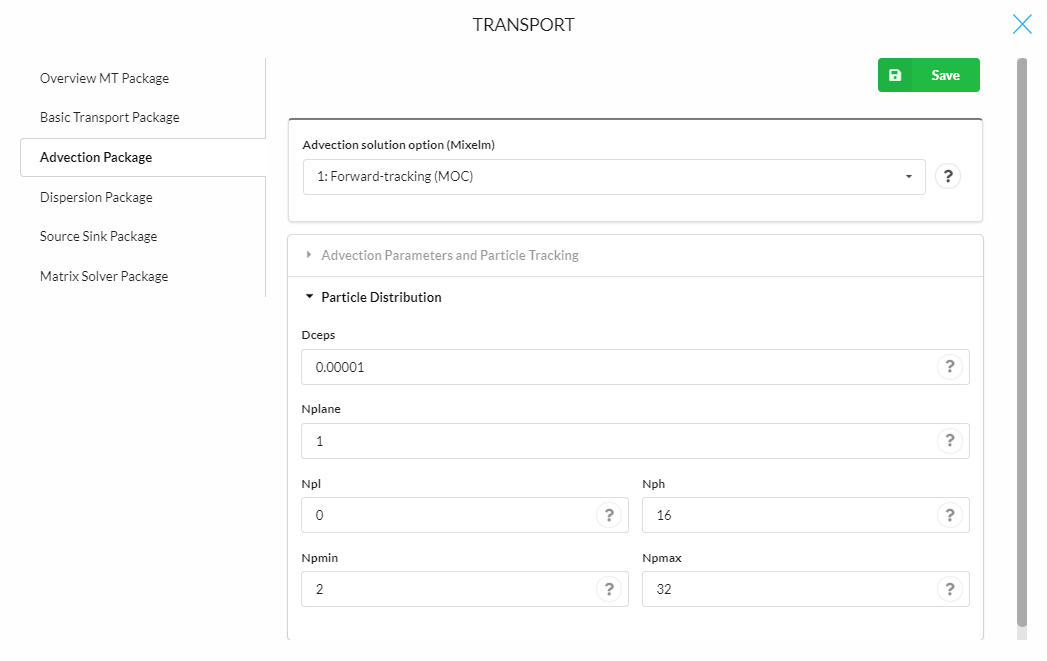

In [10]:
Image('doc/adv3.png')

Mixelm = 2 is the backward-tracking modified method of characteristics (MMOC)
> The following parameters are for determining advection and particle tracking:
> * Conrant number (Percel)
> * Particle tracking algorithm (Itrack)
> * Concentration weighting factor (Wd)

> The following parameters are for solution flags and critical concentration:
> * Nlsink: is a flag indicating whether the random or fixed pattern is selected for initial placement of particles to approximate sink cells in the MMOC scheme. The convention is the same as that for NPLANE. It is generally adequate to set NLSINK equivalent to NPLANE.
> * Npsink: is the number of particles used to approximate sink cells in the MMOC scheme. The convention is the same as that for NPH. It is generally adequate to set NPSINK equivalent to NPH.

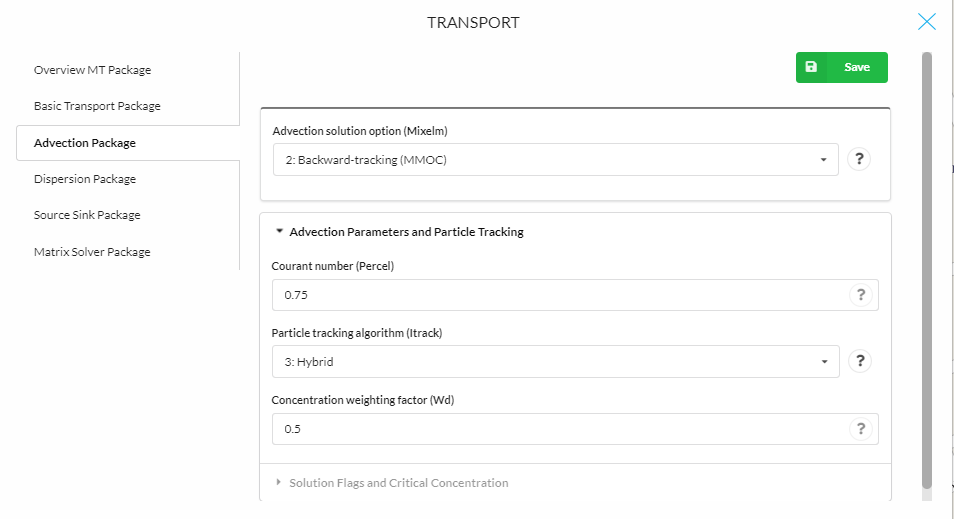

In [11]:
Image('doc/adv4.png')

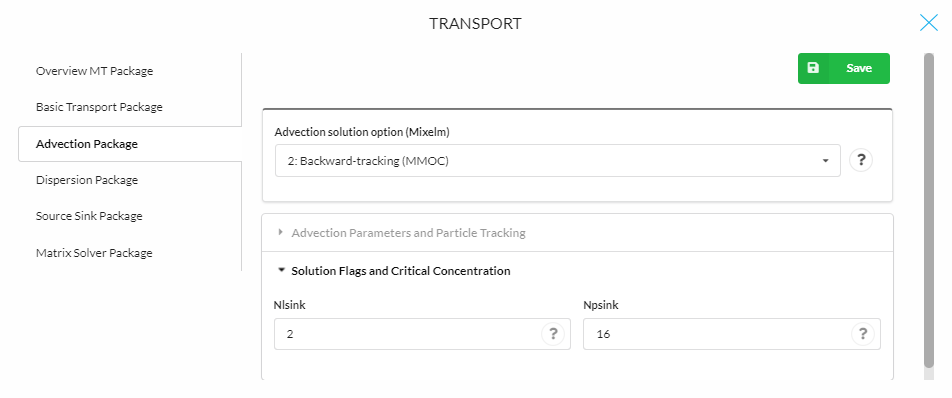

In [12]:
Image('doc/adv5.png')

Mixelm = 3 is the hybrid method of characteristics (HMOC) with MOC or MMOC automatically and dynamically selected
> The following parameters are for determining advection and particle tracking:
> * Conrant number (Percel)
> * Maximum moving particles (Mxpart)  
> * Particle tracking algorithm (Itrack)
> * Concentration weighting factor (Wd)

> The following parameters are for determining particle distribution:
> * Dceps
> * Nplane
> * Npl
> * Nph
> * Npmin
> * Npmax

> The following parameters are for solution flags and critical concentration:
> * Nlsink
> * Npsink

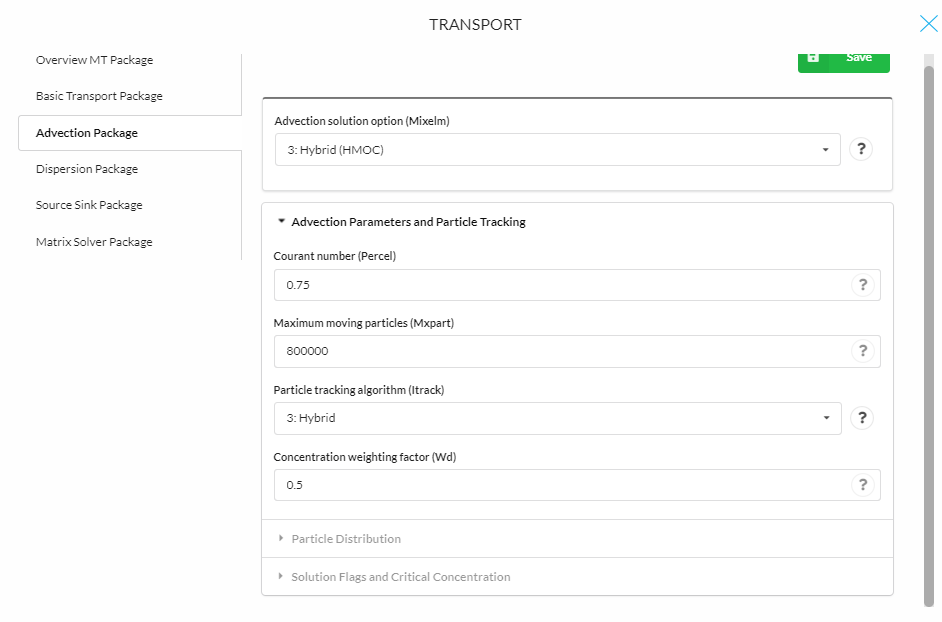

In [13]:
Image('doc/adv6.png')

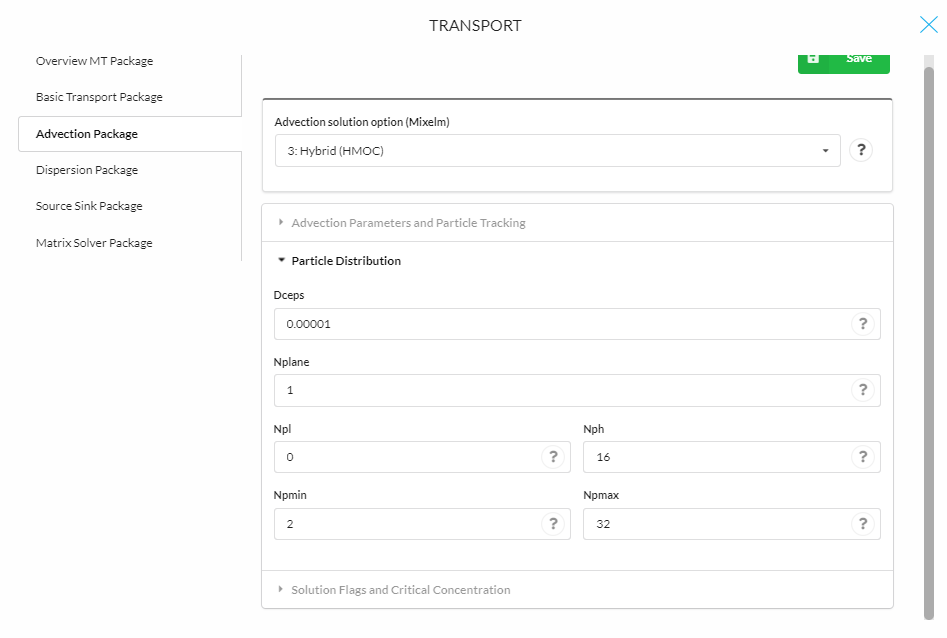

In [14]:
Image('doc/adv7.png')

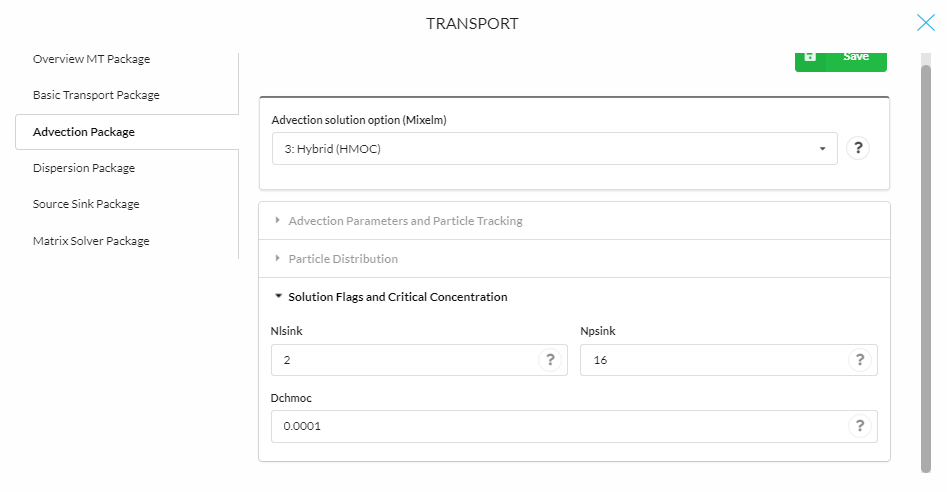

In [15]:
Image('doc/adv8.png')

Mixelm = -1, the third-order TVD scheme (ULTIMATE)
> The following parameters are for determining advection and particle tracking:
> * Conrant number (Percel)

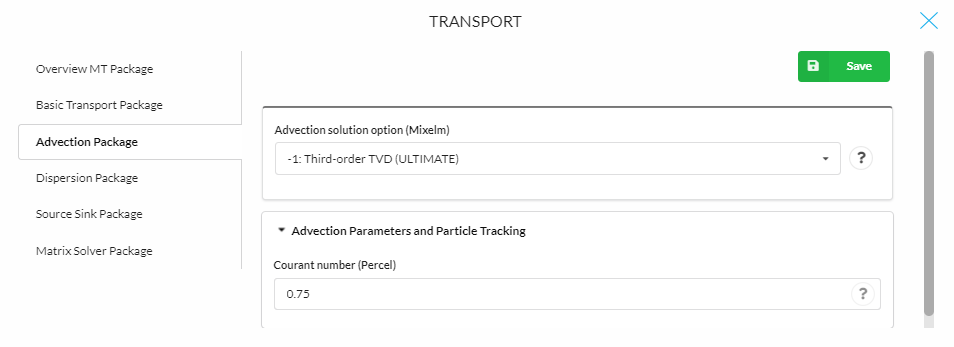

In [16]:
Image('doc/adv9.png')

### Dispersion Package

The following parameters are required in the dispersion package:
* Longitudinal dispersivity (Al): is the longitudinal dispersivity, for every cell of the model grid (unit, L). (default is 0.01)
* Trpt: is the ratio of the horizontal transverse dispersivity to the longitudinal dispersivity. Some recent field studies suggest that TRPT is generally not greater than 0.1. (default is 0.1)
* Trpv: is the ratio of the vertical transverse dispersivity to the longitudinal dispersivity. Some recent field studies suggest that TRPT is generally not greater than 0.01. (default is 0.01) 
* Effective molecular diffusion coefficient (dmcoef): is the effective molecular diffusion coefficient (unit, L2T-1). Set DMCOEF = 0 if the effect of molecular diffusion is considered unimportant. (default is 1.e-9)

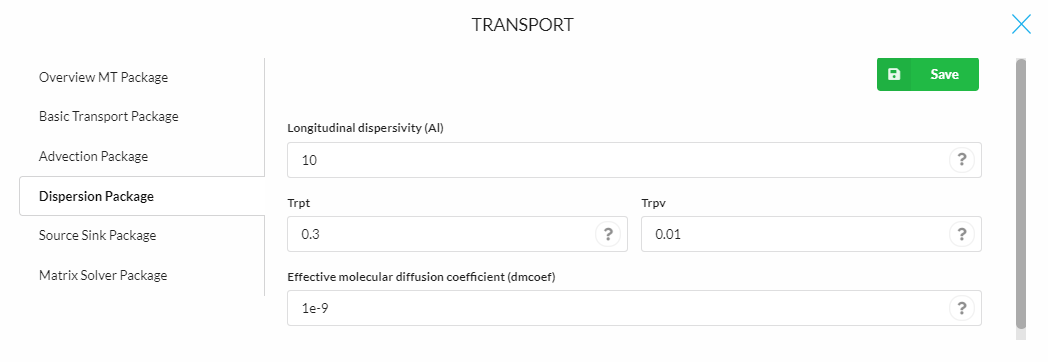

In [17]:
Image('doc/dsp.png')

### Source Sink Package 

The following steps is to add source and sink in the simulation:
1. Determine which boundary would be the source/ sink in the simulation.
2. Click the "plus mark" (in the blue round rectangular) to add a new substance.
3. Define the substance name, start time and concentration in the upcoming windows.

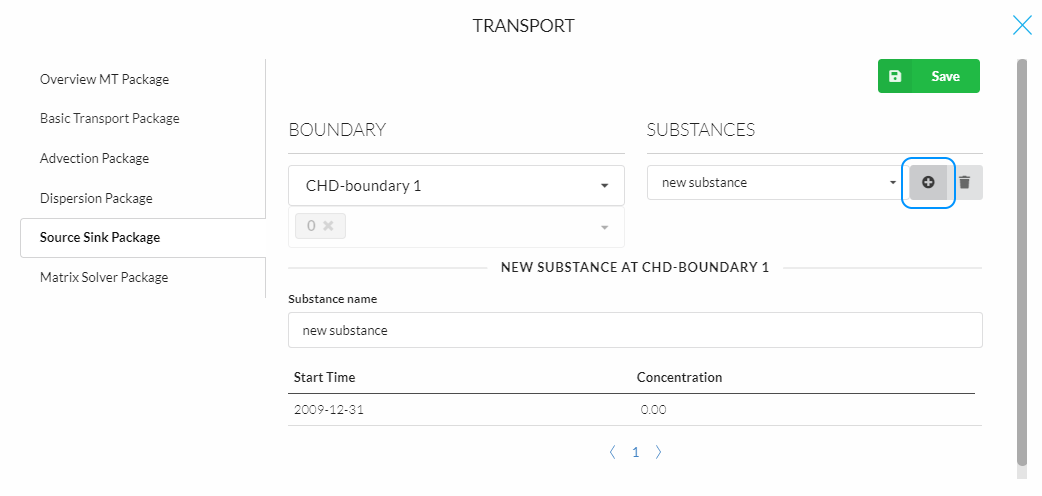

In [18]:
Image('doc/ssm.png')

### Matrix Solver Package

The solver on the platform is based on Generalized Conjugate Gradient (GCG) Package, which has following essential parameters: 
* Maximum outer iterations (Mxiter): is the maximum number of outer iterations; it should be set to an integer greater than one only when a nonlinear sorption isotherm is included in simulation. (default is 1)
* Maximum inner iterations (Lter1): is the maximum number of inner iterations; a value of 30-50 should be adequate for most problems. (default is 50)
* Preconditioners to be used with the Lanczos/ORTHOMIN acceleration scheme (Isolve):
> * = 1, Jacobi 
> * = 2, SSOR 
> * = 3, Modified Incomplete Cholesky (MIC) (MIC usually converges faster, but it needs significantly more memory) (default)

* Treatment of dispersion tensor cross terms (Ncrs):
> * = 0, lump all dispersion cross terms to the right-hand-side (approximate but highly efficient). (default)
> * = 1, include full dispersion tensor (memory intensive). 

* Relaxation factor for the SSOR option (Accl): is the relaxation factor for the SSOR option; a value of 1.0 is generally adequate. (default is 1)

* Convergence criterion in terms of relative concentration (Cclose): is the convergence criterion in terms of relative concentration; a real value between 10-4 and 10-6 is generally adequate. (default is 1.E-5)

* Maximum concentration changes of each iteration (iprgcg): IPRGCG is the interval for printing the maximum concentration changes of each iteration. Set IPRGCG to zero as default for printing at the end of each stress period. (default is 0)

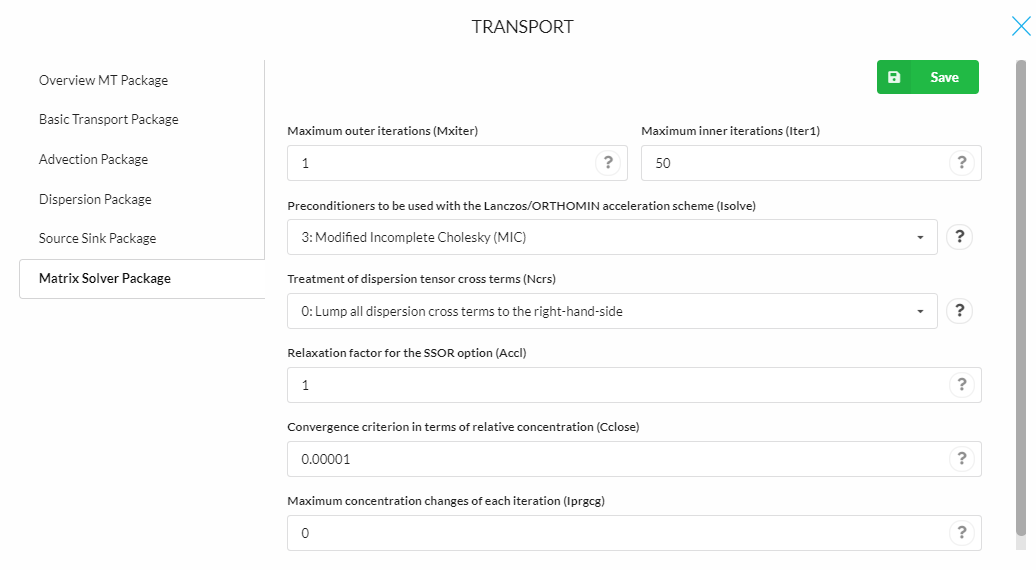

In [19]:
Image('doc/gcg.png')

## EXTERNAL LINKS:
For more information on the individual packages and program functionalities, see the [Flopy mt3dms online guide](http://modflowpy.github.io/flopydoc/code.html#mt3dms-packages) and [MT3DMS Documentation and User's Guide](http://www.geology.wisc.edu/courses/g727/mt3dmanual.pdf).

## Reference
* Zheng, C. and Wang, P. P. (1999) MT3DMS: A Modular Three-dimensional Multi species Transport Model for Simulation of Advection, Dispersion, and Chemical Reactions of Contaminants in Ground Water Systems.